# Feature catalog example for spark 

Define multiple features with clear lineage using Hamilton.
Use a custom output builder to join the features of interest together before returning them to the user.

As user you only need to specify which features (groups of features) you want to compute.

## Including column level lineage
By using the `@schema.output` decorator you can extend the lineage up to column level, e.g.:

```python
@schema.output(("zone", "str"), ("level", "int"), ("avatarId", "int"))
```

## Download data
To get started first download the data: 
```
curl https://storage.googleapis.com/shareddatasets/wow.parquet -o data/wow.parquet
```

In [1]:
import findspark
findspark.init()

import importlib
import logging
import sys
import typing

import pyspark.sql as ps

from hamilton import base
from hamilton import driver

logging.basicConfig(stream=sys.stdout)

%load_ext autoreload
%autoreload 2

/Users/elijahbenizzy/.pyenv/versions/3.11.4/envs/hamilton-3-11-fresh/lib/python3.11/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


### Create a customer builder and adapter to create the final output (spark DataFrame)

In [2]:
class MyCustomBuilder(base.ResultMixin):
     @staticmethod
     def build_result(**outputs: typing.Dict[str, typing.Any]) -> ps.DataFrame:
        # TODO: add error handling when incompatible outputs are created
        level_info = outputs['level_info']
        zone_counts = outputs['zone_counts']
        return zone_counts.join(level_info, on=aggregation_level)

adapter = base.SimplePythonGraphAdapter(MyCustomBuilder)

### Create the driver and show the lineage

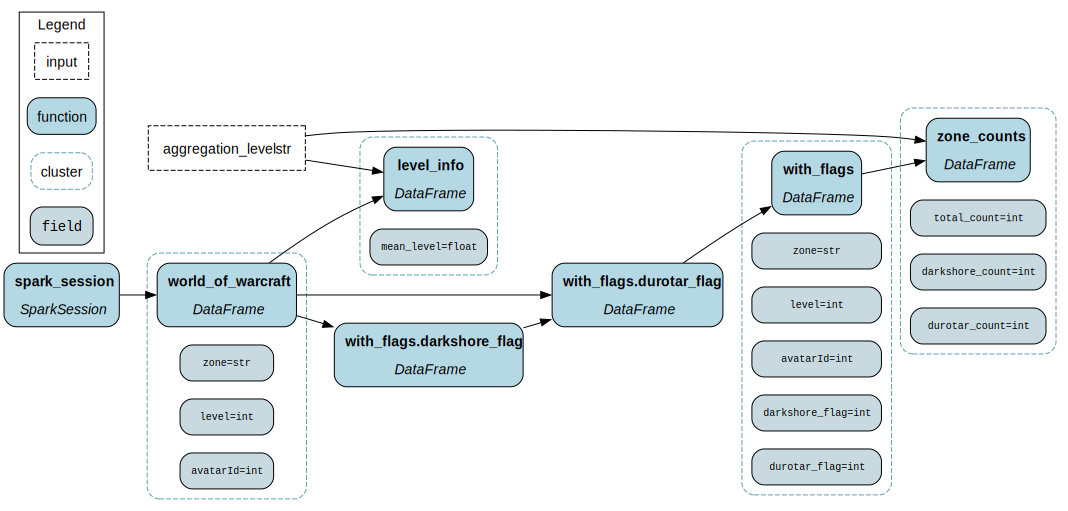

In [3]:
aggregation_level = "avatarId"
zone_features = importlib.import_module("features")

dr = driver.Driver({}, zone_features, adapter=adapter)  # can pass in multiple modules
dr.display_all_functions(deduplicate_inputs=True)

### Compute the features of interest

In [ ]:
feature_groups_of_interest = ["level_info", "zone_counts"]
features = dr.execute(feature_groups_of_interest, inputs={"aggregation_level": aggregation_level})
features.show()